# Lab 11: Image Segmentation
Name: **Raja Hasnain Anwar**<br/>
Registration: **192135**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

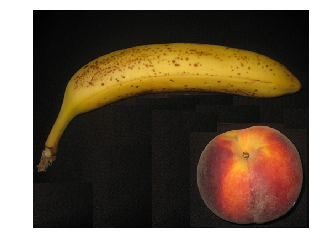

In [2]:
img = cv2.imread('faroot.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)
plt.show()

## Otsu's Binarization

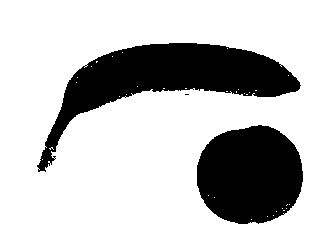

In [3]:
 _, bi_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),40,255,cv2.THRESH_BINARY)

plt.axis('off')
plt.imshow(bi_img, cmap='binary')
plt.show()

## Morphology

In [4]:
kernel = np.ones((5,5),np.uint8)
bi_img = cv2.dilate(bi_img,kernel,iterations = 1)
bi_img = cv2.erode(bi_img,kernel,iterations = 1)

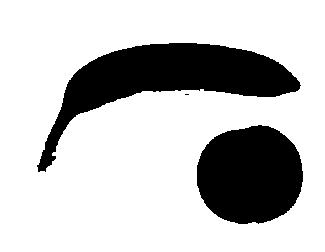

In [5]:
plt.axis('off')
plt.imshow(bi_img, cmap='binary')
plt.show()

# Labelling

In [6]:
_, labels = cv2.connectedComponents(bi_img)

In [7]:
def label_image(labels):
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue==0] = 0
    return labeled_img

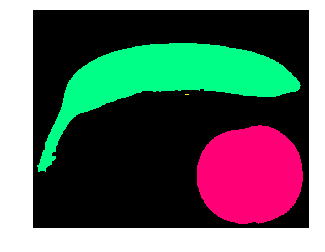

In [8]:
out = label_image(labels)

plt.axis('off')
plt.imshow(out, cmap='nipy_spectral')
plt.show()